# Adding Context to Word Frequency Counts

While the raw data from word frequency counts is compelling, it does little but describe quantitative features of the corpus. In order to determine if the statistics are indicative of a trend in word usage we must add value to the word frequencies. In this exercise we will produce a ratio of the occurences of `privacy` to the number of words in the entire corpus. Then we will compare the occurences of `privacy` to the indivudal number of transcripts within the corpus. This data will allow us identify trends that are worthy of further investigation.

Finally, we will determine the number of words in the corpus as a whole and investigate the 50 most common words by creating a frequency plot. The last statistic we will generate is the type/token ratio, which is a measure of the variability of the words used in the corpus.

### Part 1: Determining a ratio

To add context to our word frequency counts, we can work with the corpus in a number of different ways. One of the easiest is to compare the number of words in the entire corpus to the frequency of the word we are investigating.

Let's begin by calling on all the <span style="cursor:help;" title="a set of instructions that performs a specific task"><b>functions</b></span> we will need. Remember that the first few sentences are calling on pre-installed <i>Python</i> <span style="cursor:help;" title="packages of functions and code that serve specific purposes"><b>modules</b></span>, and anything with a `def` at the beginning is a custom function built specifically for these exercises. The text in red describes the purpose of the function.

In [3]:
# This is where the modules are imported

import nltk
from os import listdir
from os.path import splitext
from os.path import basename
from tabulate import tabulate

# These functions iterate through the directory and create a list of filenames

def list_textfiles(directory):
    "Return a list of filenames ending in '.json'"
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".json"):
            textfiles.append(directory + "/" + filename)
    return textfiles


def remove_ext(filename):
    "Removes the file extension, such as .txt"
    name, extension = splitext(filename)
    return name


def remove_dir(filepath):
    "Removes the path from the file name"
    name = basename(filepath)
    return name


def get_filename(filepath):
    "Removes the path and file extension from the file name"
    filename = remove_ext(filepath)
    name = remove_dir(filename)
    return name

# These functions work on the content of the files

def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    infile = open(filename)
    contents = infile.read()
    infile.close()
    return contents

def count_in_list(item_to_count, list_to_search):
    "Counts the number of a specified word within a list of words"
    number_of_hits = 0
    for item in list_to_search:
        if item == item_to_count:
            number_of_hits += 1
    return number_of_hits

In the next piece of code we will cycle through our directory again: first assigning readable names to our files and storing them as a list in the variable `filenames`; then we will remove the case and punctuation from the text, split the words into a list of tokens, and assign the words in each file to a list in the variable `corpus`.

In [5]:
filenames = []
for files in list_textfiles("../scrapy"):
    files = get_filename(files)
    filenames.append(files)

In [6]:
corpus = []
for filename in list_textfiles("../scrapy"):
    text = read_file(filename)
    words = text.split()
    clean = [w.lower() for w in words if w.isalpha()]
    corpus.append(clean)

Here we recreate our list from the last exercise, counting the instances of the word `privacy` in each file.

In [7]:
for words, names in zip(corpus, filenames):
    print("Instances of the word \'privacy\' in", names, ":", count_in_list("privacy", words))

Instances of the word 'privacy' in metadata : 0
Instances of the word 'privacy' in quotes : 0
Instances of the word 'privacy' in result : 0
Instances of the word 'privacy' in result1 : 0
Instances of the word 'privacy' in result10 : 0
Instances of the word 'privacy' in result11 : 0
Instances of the word 'privacy' in result2 : 0
Instances of the word 'privacy' in result4 : 0
Instances of the word 'privacy' in result9 : 0


Next we use the `len` function to count the total number of words in each file.

In [8]:
for files, names in zip(corpus, filenames):
    print("There are", len(files), "words in", names)

There are 95 words in metadata
There are 502 words in quotes
There are 77 words in result
There are 1125 words in result1
There are 874 words in result10
There are 976 words in result11
There are 1140 words in result2
There are 1187 words in result4
There are 923 words in result9


Now we can calculate the ratio of the word `privacy` to the total number of words in the file. To accomplish this we simply divide the two numbers.

In [6]:
print("Ratio of instances of privacy to total number of words in the corpus:")
for words, names in zip(corpus, filenames):
    print('{:.6f}'.format(float(count_in_list("privacy", words))/(float(len(words)))),":",names)

Ratio of instances of privacy to total number of words in the corpus:
0.000069 : 2006
0.000043 : 2007
0.000052 : 2008
0.000091 : 2009
0.000085 : 2010
0.000115 : 2011
0.000077 : 2012
0.000149 : 2013
0.000223 : 2014
0.000202 : 2015
0.000058 : 39-1
0.000050 : 39-2
0.000055 : 39
0.000039 : 40-1
0.000089 : 40-2
0.000128 : 40-3
0.000108 : 40
0.000084 : 41-1
0.000178 : 41-2
0.000142 : 41


Now our descriptive statistics concerning word frequencies have added value. We can see that there has indeed been a steady increase in the frequency of the use of the word `privacy` in our corpus. When we investigate the yearly usage, we can see that the frequency almost doubled between 2008 and 2009, as well as dramatic increase between 2012 and 2014. This is also apparent in the difference between the 39th and the 40th sittings of Parliament. 

------

Let's package all of the data together so it can be displayed as a table or exported to a `CSV` file. First we will write our values to a list: `raw` contains the raw frequencies, and `ratio` contains the ratios. Then we will create a <span style="cursor:help;" title="a type of list where the values are permanent"><b>tuple</b></span> that contains the `filename` variable and includes the corresponding `raw` and `ratio` variables. Here we'll generate the ratio as a percentage.

In [7]:
raw = []
for i in range(len(corpus)):
    raw.append(count_in_list("privacy", corpus[i]))

ratio = []  
for i in range(len(corpus)):
    ratio.append('{:.3f}'.format((float(count_in_list("privacy", corpus[i]))/(float(len(corpus[i])))) * 100))
    
table = zip(filenames, raw, ratio)

Using the `tabulate` module, we will display our tuple as a table.

In [8]:
print(tabulate(table, headers = ["Filename", "Raw", "Ratio %"], floatfmt=".3f", numalign="left"))

Filename    Raw    Ratio %
----------  -----  ---------
2006        356    0.007
2007        258    0.004
2008        252    0.005
2009        612    0.009
2010        533    0.009
2011        624    0.012
2012        552    0.008
2013        918    0.015
2014        1567   0.022
2015        806    0.020
39-1        538    0.006
39-2        308    0.005
39          846    0.005
40-1        20     0.004
40-2        603    0.009
40-3        2022   0.013
40          1643   0.011
41-1        1287   0.008
41-2        885    0.018
41          3989   0.014


And finally, we will write the values to a `CSV` file called `privacyFreqTable`.

In [9]:
import csv
with open('privacyFreqTable.csv','wb') as f:
    w = csv.writer(f)
    w.writerows(table)

-----------

### Part 2: Counting the number of transcripts

Another way we can provide context is to process the corpus in a different way. Instead of splitting the data by word, we will split it in larger chunks pertaining to each individual transcript. Each transcript corresponds to a unique debate but starts with exactly the same formatting, making the files easy to split. The text below shows the beginning of a transcript. The first words are `OFFICIAL REPORT (HANSARD)`.

<img src="hansardText.png">

Here we will pass the files to another variable, called `corpus_1`. Instead of removing capitalization and punctuation, all we will do is split the files at every occurence of `OFFICIAL REPORT (HANSARD)`.

In [10]:
corpus_1 = []
for filename in list_textfiles('../Counting Word Frequencies/data'):
    text = read_file(filename)
    words = text.split(" OFFICIAL REPORT (HANSARD)")
    corpus_1.append(words)

Now, we can count the number of files in each dataset. This is also an important activity for error-checking. While it is easy to trust the numerical output of the code when it works sucessfully, we must always be sure to check that the code is actually performing in exactly the way we want it to. In this case, these numbers can be cross-referenced with the original XML data, where each transcript exists as its own file. A quick check of the directory shows that the numbers are correct.

In [11]:
for files, names in zip(corpus_1, filenames):
    print("There are", len(files), "files in", names)

There are 97 files in 2006
There are 117 files in 2007
There are 93 files in 2008
There are 128 files in 2009
There are 119 files in 2010
There are 99 files in 2011
There are 131 files in 2012
There are 111 files in 2013
There are 127 files in 2014
There are 74 files in 2015
There are 177 files in 39-1
There are 119 files in 39-2
There are 294 files in 39
There are 14 files in 40-1
There are 129 files in 40-2
There are 299 files in 40-3
There are 290 files in 40
There are 276 files in 41-1
There are 95 files in 41-2
There are 512 files in 41


Here is a screenshot of some of the raw data. We can see that there are <u>97</u> files in 2006, <u>117</u> in 2007 and <u>93</u> in 2008. The rest of the data is also correct. 

<img src="filecount.png">

Now we can compare the amount of occurences of `privacy` with the number of debates occuring in each dataset.

In [12]:
for names, files, words in zip(filenames, corpus_1, corpus):
    print("In", names, "there were", len(files), "debates. The word privacy was said", \
    count_in_list('privacy', words), "times.")

In 2006 there were 97 debates. The word privacy was said 356 times.
In 2007 there were 117 debates. The word privacy was said 258 times.
In 2008 there were 93 debates. The word privacy was said 252 times.
In 2009 there were 128 debates. The word privacy was said 612 times.
In 2010 there were 119 debates. The word privacy was said 533 times.
In 2011 there were 99 debates. The word privacy was said 624 times.
In 2012 there were 131 debates. The word privacy was said 552 times.
In 2013 there were 111 debates. The word privacy was said 918 times.
In 2014 there were 127 debates. The word privacy was said 1567 times.
In 2015 there were 74 debates. The word privacy was said 806 times.
In 39-1 there were 177 debates. The word privacy was said 538 times.
In 39-2 there were 119 debates. The word privacy was said 308 times.
In 39 there were 294 debates. The word privacy was said 846 times.
In 40-1 there were 14 debates. The word privacy was said 20 times.
In 40-2 there were 129 debates. The word 

These numbers confirm our earlier results. There is a clear indication that the usage of the term `privacy` is increasing, with major changes occuring between the years 2008 and 2009, as well as between 2012 and 2014. This trend is also clearly obervable between the 39th and 40th sittings of Parliament. 

------

### Part 3: Looking at the corpus as a whole

While chunking the corpus into pieces can help us understand the distribution or dispersion of words throughout the corpus, it's valuable to look at the corpus as a whole. Here we will create a third corpus variable `corpus_3` that only contains the files named `39`, `40`, and `41`. Note the new directory named `data2`. We only need these files; if we used all of the files we would literally duplicate the results.

In [13]:
corpus_3 = []
for filename in list_textfiles('../Counting Word Frequencies/data2'):
    text = read_file(filename)
    words = text.split()
    clean = [w.lower() for w in words if w.isalpha()]
    corpus_3.append(clean)

Now we will combine the three lists into one large list and assign it to the variable `large`.

In [14]:
large = list(sum(corpus_3, []))

We can use the same calculations to determine the total number of occurences of `privacy`, as well as the total number of words in the corpus. We can also calculate the total ratio of `privacy` to the total number of words.

In [15]:
print("There are", count_in_list('privacy', large), "occurences of the word 'privacy' and a total of", \
len(large), "words.")

print("The ratio of instances of privacy to total number of words in the corpus is:", \
'{:.6f}'.format(float(count_in_list("privacy", large))/(float(len(large)))), "or", \
'{:.3f}'.format((float(count_in_list("privacy", large))/(float(len(large)))) * 100),"%")

There are 6478 occurences of the word 'privacy' and a total of 58776851 words.
The ratio of instances of privacy to total number of words in the corpus is: 0.000110 or 0.011 %


Another type of word frequency statistic we can generate is a type/token ratio. The types are the total number of unique words in the corpus, while the tokens are the total number of words. The type/token ratio is used to determine the variability of the language used in the text. The higher the ratio, the more complex the text will be. First we'll determine the total number of types, using <i>Python's</i> `set` function.

In [16]:
print("There are", (len(set(large))), "unique words in the Hansard corpus.")

There are 71415 unique words in the Hansard corpus.


Now we can divide the types by the tokens to determine the ratio.

In [17]:
print("The type/token ratio is:", ('{:.6f}'.format(len(set(large))/(float(len(large))))), "or",\
'{:.3f}'.format(len(set(large))/(float(len(large)))*100),"%")

The type/token ratio is: 0.001215 or 0.122 %


Finally, we will use the `NLTK` module to create a graph that shows the top 50 most frequent words in the Hansard corpus. Although `privacy` will not appear in the graph, it's always interesting to see what types of words are most common, and what their distribution is. `NLTK` will be introduced with more detail in the next section featuring concordance outputs, but here all we need to know is that we assign our variable `large` to the `NLTK` function `Text` in order to work with the corpus data. From there we can determine the frequency distribution for the whole text.

In [18]:
text = nltk.Text(large)
fd = nltk.FreqDist(text)

Here we will assign the frequency distribution to the `plot` function to produce a graph. While it's a little hard to read, the most commonly used word in the Hansard corpus is `the`, with a frequency just over 400,000 occurences. The next most frequent word is `to`, which only has a frequency of about 225,000 occurences, almost half of the first most common word. The first 10 most frequent words appear with a much greater frequency than any of the other words in the corpus.

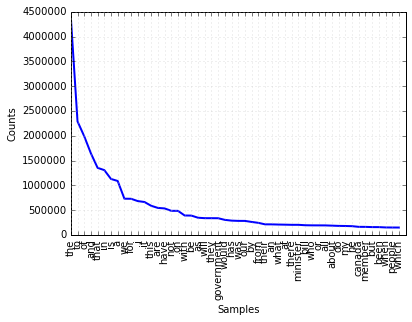

In [19]:
%matplotlib inline
fd.plot(50,cumulative=False)

Another feature of the `NLTK` frequency distribution function is the generation of a list of hapaxes. These are words that appear only once in the entire corpus. While not meaningful for this study, it's an interesting way to explore the data.

In [20]:
fd.hapaxes()

['eeny',
 'subscriptive',
 'barnwell',
 'ejects',
 'dod',
 'haditha',
 'ul',
 'goodhew',
 'salmonids',
 'avening',
 'blanchfield',
 'thenceforward',
 'rothsay',
 'coulomb',
 'rcmps',
 'chrétienne',
 'tiampo',
 'commited',
 'homespun',
 'stringray',
 'kurd',
 'arda',
 'burnishing',
 'premarketing',
 'competences',
 'hanlon',
 'ormstown',
 'mitel',
 'manaye',
 'arrowheads',
 'impôtante',
 'habbib',
 'irreplaceably',
 'wasley',
 'militarize',
 'kulak',
 'egotistic',
 'naden',
 'quirky',
 'naturescape',
 'maybelline',
 'biodome',
 'lasantha',
 'agop',
 'horsing',
 'disarticulation',
 'advertized',
 'mobasher',
 'velocities',
 'strenghtening',
 'secur',
 'grandmaster',
 'ephat',
 'bracton',
 'unabomber',
 'greedily',
 'carlington',
 'nordick',
 'entrapped',
 'ole',
 'moldable',
 'leber',
 'gosinski',
 'brownouts',
 'meteors',
 'roschlau',
 'hpr',
 'tragicomic',
 'subitem',
 'darwinian',
 'nickola',
 'bûcheron',
 'maclennan',
 'dashes',
 'deconfederation',
 'volcano',
 'irrelevancies',
 'che

The next section will use `NLTK` to create generate concordance outputs featuring the word `privacy`.